In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

In [2]:
'''
Code from notebook
'''

def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

In [3]:
names = ['Martina', "Nils", "Sebastiaan", "Alex", "Julius","extra"]

problem = {
    'num_vars': 8,
    'names': ['savings_lower', 'savings_upper', 'price_lower', 'price_upper', 
              'payoff_perc_freehold', 'inflation', 'chi_parameter', 'bank_income_multiplier'],
    'bounds': [[1, 40_000], [50_000, 100_000], [10_000, 90_000], [100_000, 1_000_000],
              [0.001,0.0025],[0.01,0.03],[5,7.5],[6,9]]    
}

In [6]:
# read in data
df_global = pd.concat([pd.read_csv(f"sobol_results/results_{name}", index_col=0) for name in names])

In [7]:
sobal_gini = sobol.analyze(problem, df_global['Gini'].values, print_to_console = True)

                              ST   ST_conf
savings_lower           0.779141  0.055592
savings_upper           0.824293  0.059624
price_lower             0.802156  0.057122
price_upper             0.881976  0.064616
payoff_perc_freehold    0.898358  0.066775
inflation               0.926629  0.061504
chi_parameter           0.961244  0.065921
bank_income_multiplier  1.018751  0.070610
                              S1   S1_conf
savings_lower          -0.013884  0.051546
savings_upper          -0.039552  0.050670
price_lower            -0.014327  0.044633
price_upper            -0.047426  0.059338
payoff_perc_freehold   -0.017135  0.058110
inflation              -0.015394  0.068352
chi_parameter          -0.028614  0.064383
bank_income_multiplier -0.002641  0.059201
                                                      S2   S2_conf
(savings_lower, savings_upper)                  0.096877  0.081229
(savings_lower, price_lower)                    0.100167  0.075211
(savings_lower, price_upp

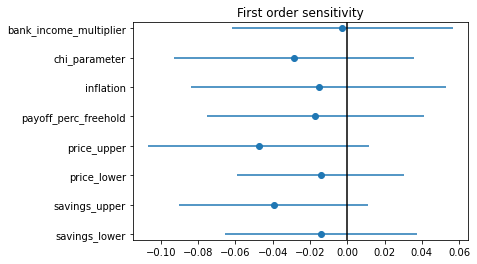

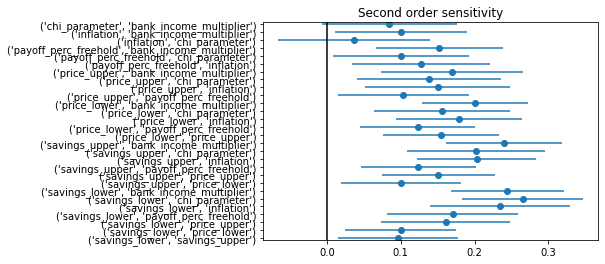

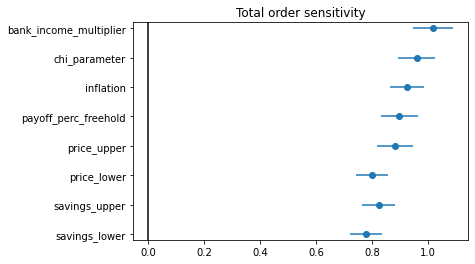

In [8]:
# First order
plot_index(sobal_gini, problem['names'], '1', 'First order sensitivity')
plt.show()

# Second order
plot_index(sobal_gini, problem['names'], '2', 'Second order sensitivity')
plt.show()

# Total order
plot_index(sobal_gini, problem['names'], 'T', 'Total order sensitivity')
plt.show()